source:
https://feisky.xyz/machine-learning/rnn/
https://brohrer.mcknote.com/zh-Hant/how_machine_learning_works/how_rnns_lstm_work.html

* Recurrent Neural Networks，RNN
* 两种人工神经网络的总称：**时间**递归神经网络（recurrent neural network）和**结构**递归神经网络（recursive neural network）
* 时间递归神经网络的神经元间连接构成有向图
* 结构递归神经网络利用相似的神经网络结构递归构造更为复杂的深度网络
* 单纯递归神经网络因为无法处理随着递归，权重指数级爆炸或消失的问题（Vanishing gradient problem），难以捕捉长期时间关联
* RNN将状态在自身网络中循环传递，因此可以接受更广泛的时间序列结构输入
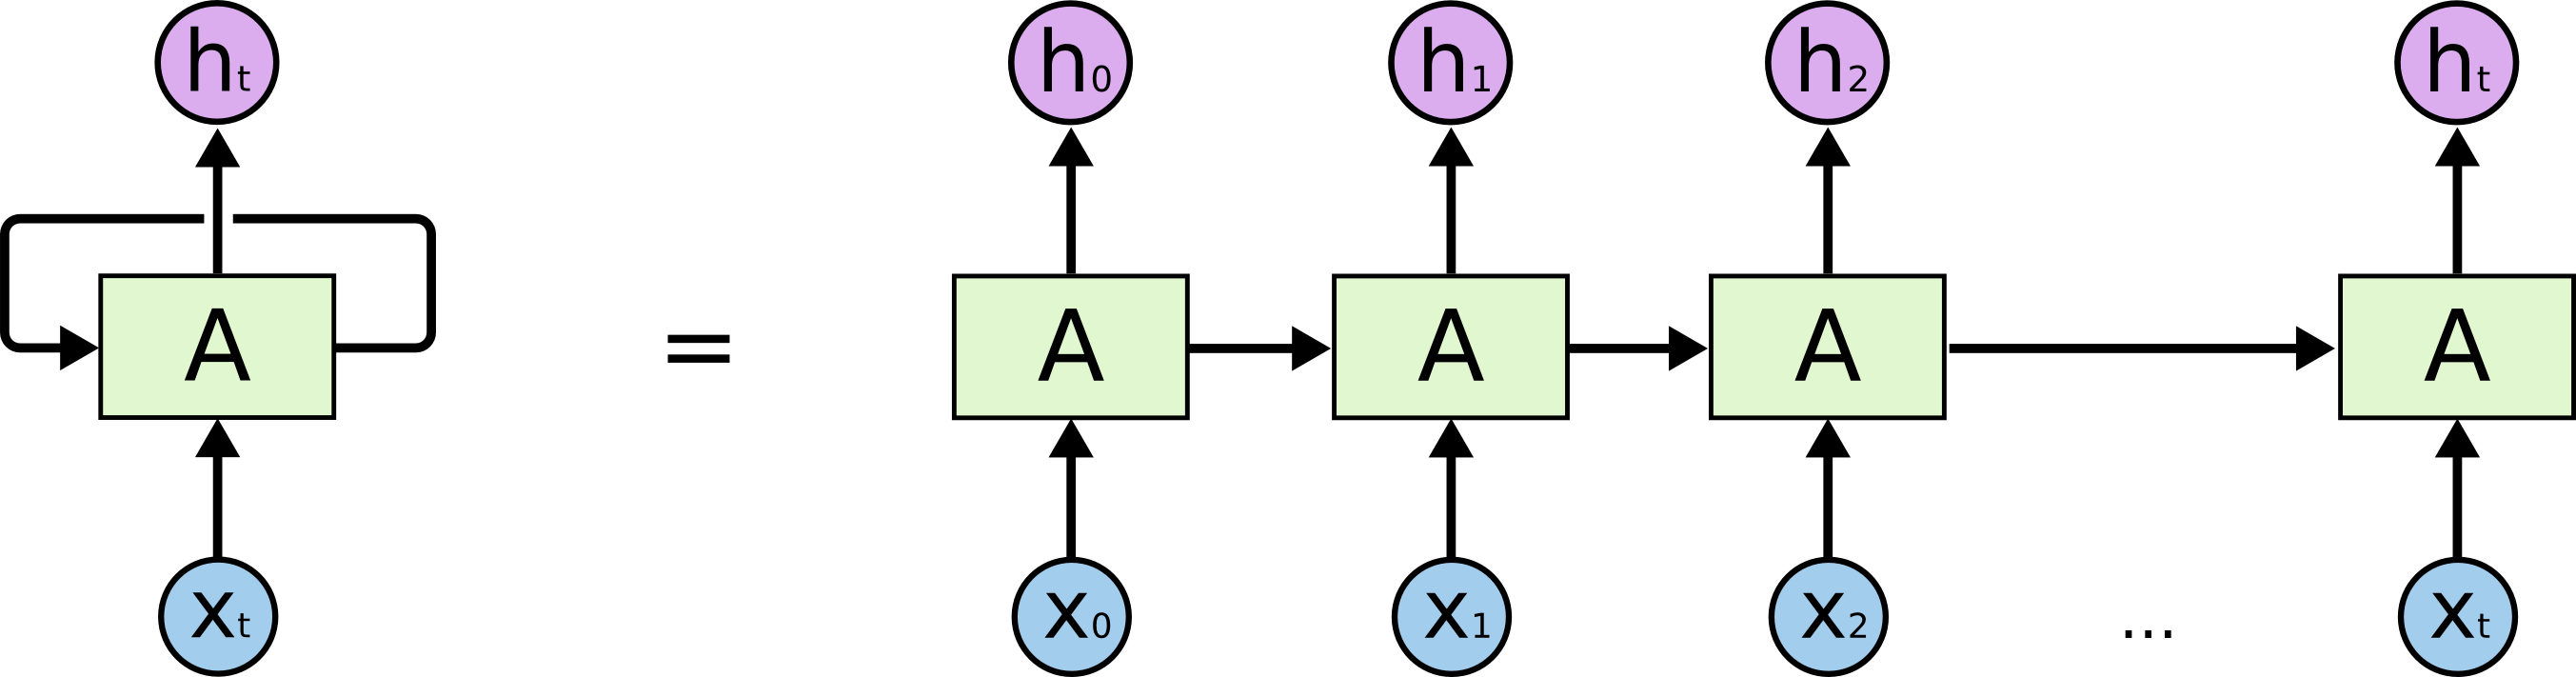

## Series序列数据
* RNN主要解决序列数据的处理，比如文本、语音、视频等等
* 这类数据的**样本间存在顺序关系**，每个样本和它之前的样本存在关联
* 比如说，在文本中，一个词和它前面的词是有关联的；在气象数据中，一天的气温和前几天的气温是有关联的
* 一组观察数据定义为一个序列
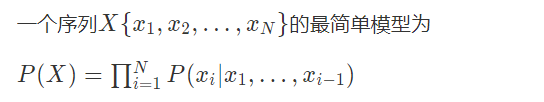

* 个模型存在致命的问题：它的**复杂度会爆炸性增长**，O(N!)
* 隐马尔科夫模型（HMM）定义每个元素只和**离它最近的k个元素相关**，解决了复杂度暴增的问题
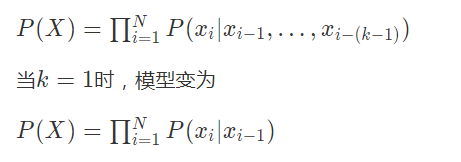

* 只考虑观察值X的模型有时表现力不足，因此需要加入**隐变量**
* 隐变量的好处在于，它的数量可以比观察值多，取值范围可以比观察值更广
* 加入了隐变量h的马尔科夫模型称为隐马尔科夫模型
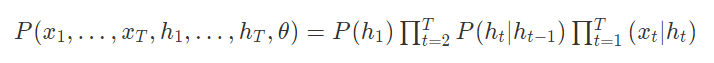
* 隐马尔科夫模型实际上建模的是观察值X，隐变量h和模型参数θ的联合分布
* HMM的模型长度T是事先固定的，模型参数不共享，其复杂度为O(T)

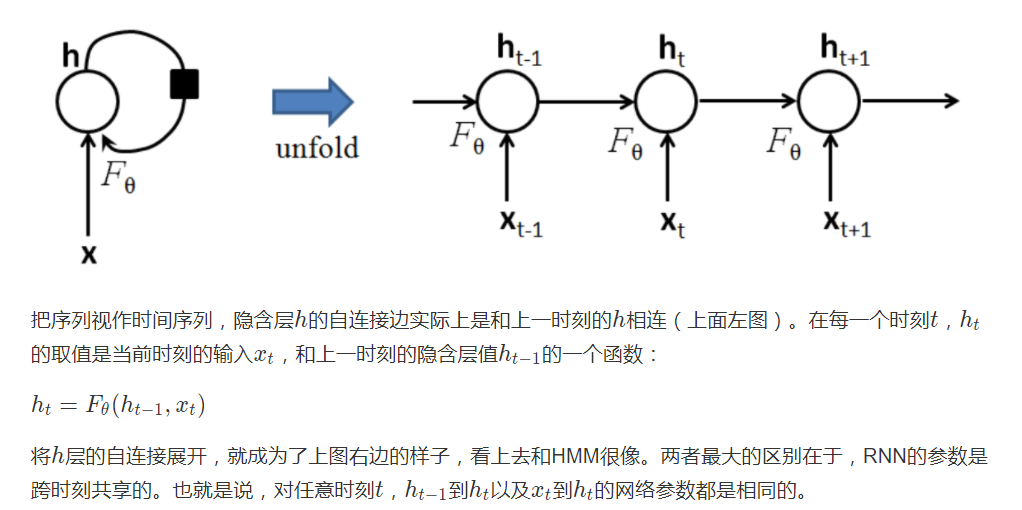
* 共享参数使得模型的复杂度大大减少，并使RNN可以适应任意长度的序列，带来了更好的可推广性

## Gradient Vanishing/Exploding (梯度消失和梯度爆炸)
* RNN训练困难的主要原因在于隐藏层参数ww的传播：由于误差传播在展开后的RNN上，无论在前向传播过程还是在反向传播过程中ww都会乘上多次，这就导致：
  - 梯度消失：如果梯度很小的话（<1），乘上多次指数级下降，对输出几乎就没有影响了
  - 梯度爆炸：反过来，如果梯度很大的话，乘上多次指数级增加，又导致了梯度爆炸

* 对于梯度爆炸问题，可以通过截断的方式来有效避免：
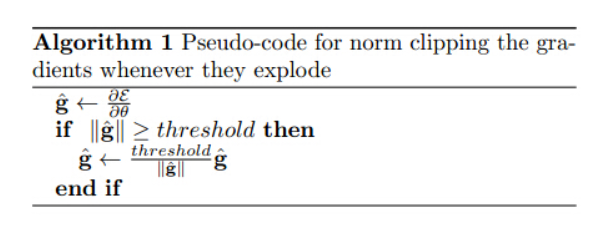

* 对梯度消失问题，则有很多不同的方案：
  - 有效初始化+ReLU激活函数能够得到较好效果
  - 算法上的优化，例如截断的BPTT算法。
  - 模型上的改进，例如LSTM、GRU单元都可以有效解决长期依赖问题。
  - 在BPTT算法中加入skip connection，此时误差可以间歇的向前传播。
  - 加入一些Leaky Units，思路类似于skip connection

## LSTM
* Long Short-Term Memory networks
* 它和传统 RNN 唯一的不同就在与其中的神经元（感知机）的构造不同
* 在 LSTM 中，每个神经元是一个“记忆细胞”（元胞状态，Cell State），将以前的信息连接到当前的任务中来

* 每个LSTM细胞里面都包含:
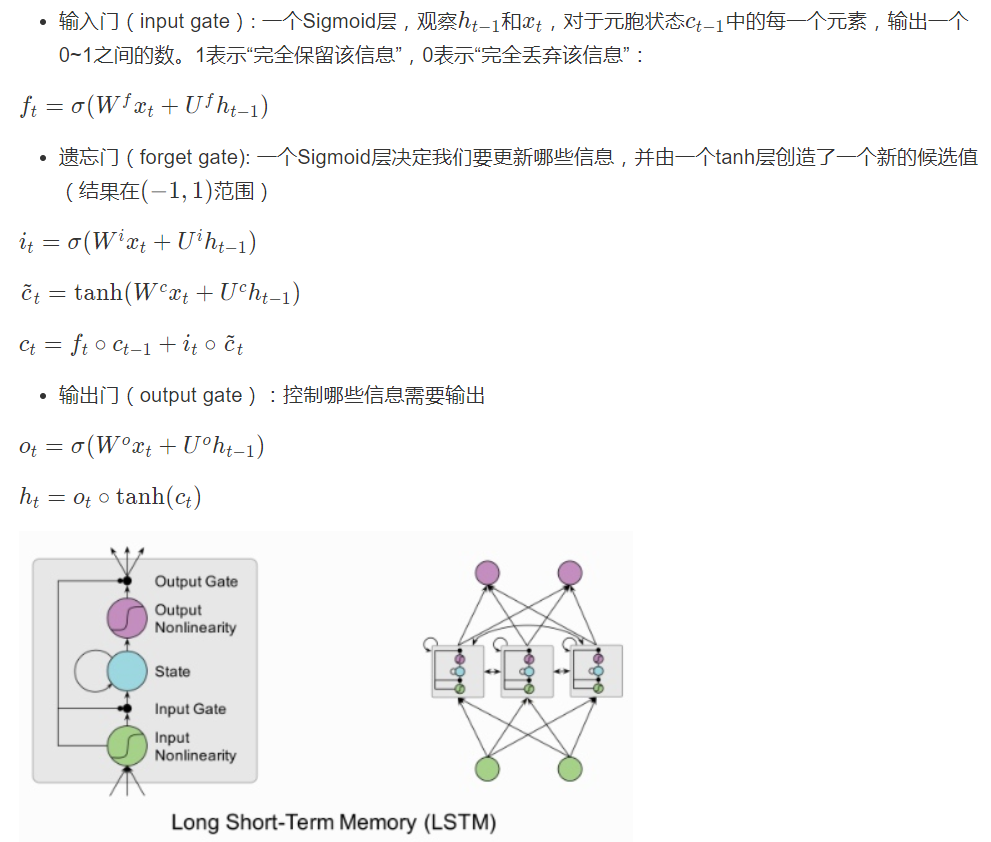

* LSTM 模型的关键之一就在于这个“遗忘门”， 它能够控制训练时候梯度在这里的收敛性（从而避免了 RNN 中的梯度 vanishing/exploding 问题），同时也能够保持长期的记忆性
* 如果我们把LSTM的forget gate全部置0（总是忘记之前的信息），input gate全部 置1，output gate全部置1（把cell state中的信息全部输出），这样LSTM就变成一个标准的RNN。
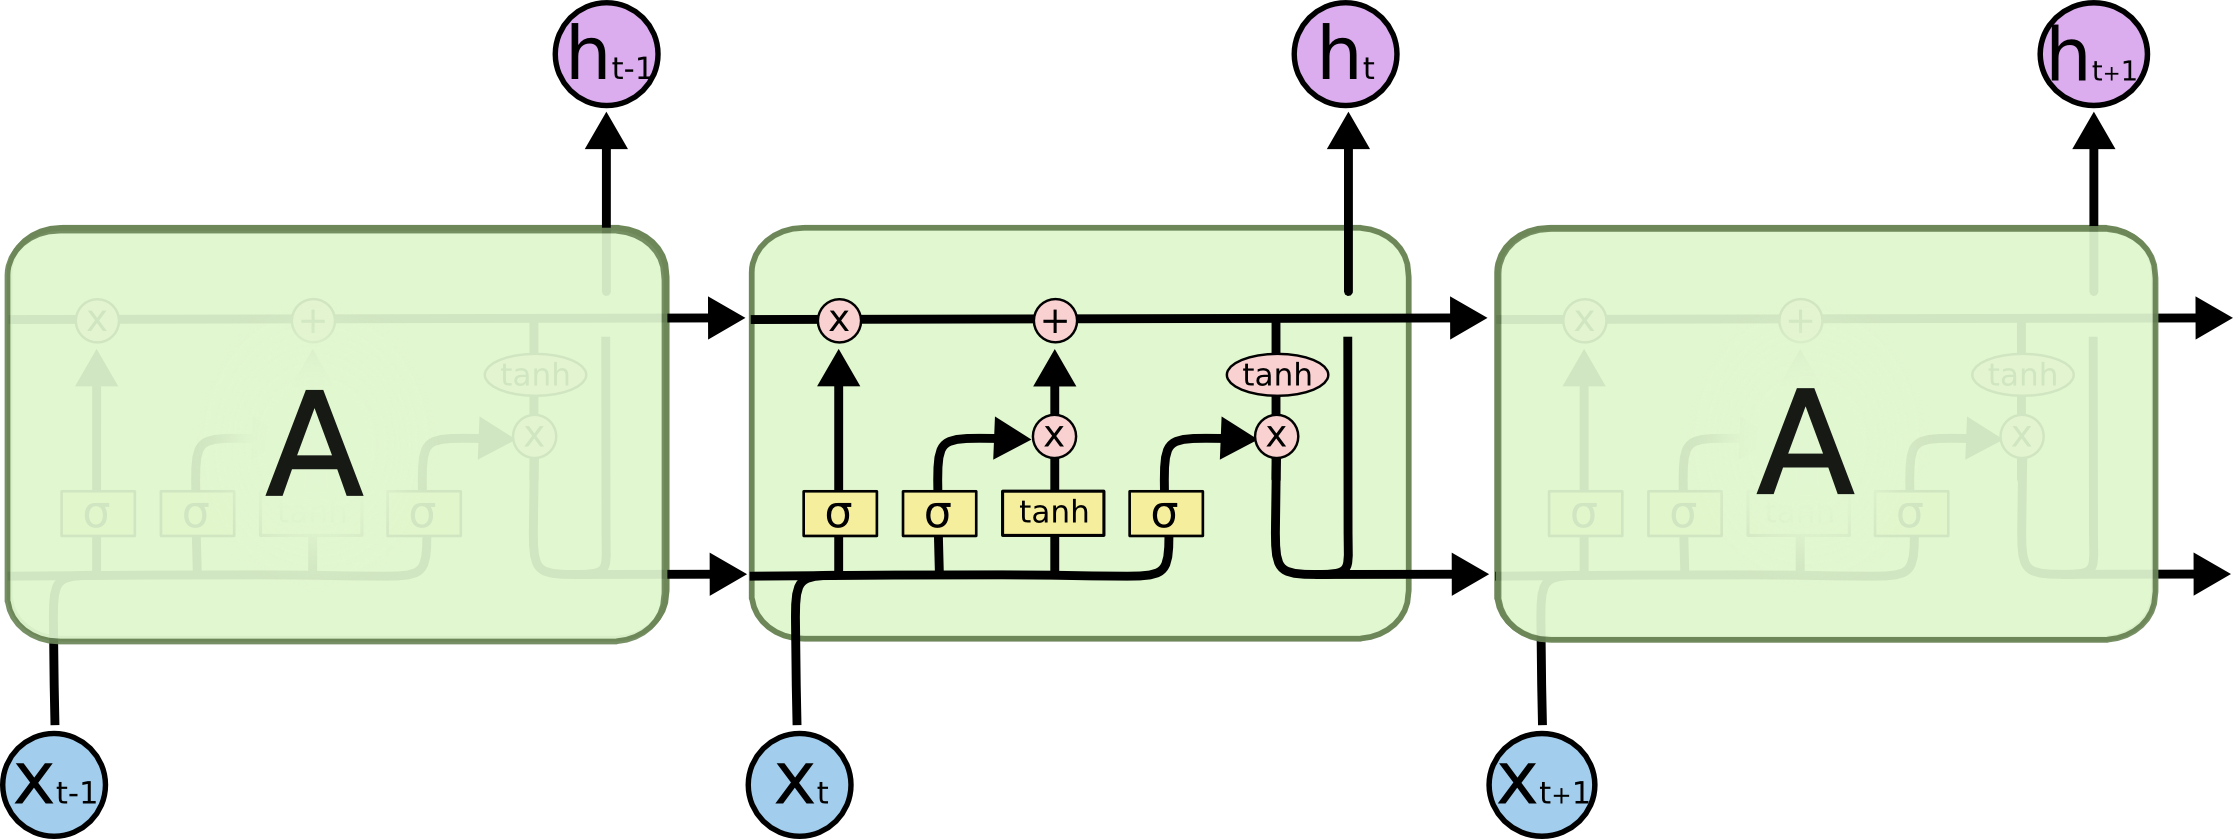